# MEAN FILTER IMPLEMENTATION

## Overview
This notebook demonstrates **image smoothing using Mean Filter**. We'll implement the filter in two ways:
1. Using **OpenCV's built-in function** (fast and optimized)
2. Using **manual implementation with NumPy** (educational and transparent)

---

## Step 1: Import Required Libraries

We need three main libraries:
- **cv2 (OpenCV)**: For image loading and built-in filtering functions
- **numpy**: For manual convolution implementation and array operations
- **matplotlib**: For displaying images side by side

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

print("Libraries imported successfully!")
print(f"OpenCV version: {cv2.__version__}")
print(f"NumPy version: {np.__version__}")

Libraries imported successfully!
OpenCV version: 4.13.0
NumPy version: 2.4.2


## Step 2: Load and Prepare the Custom Images

### Important Note:
We're loading the custom noisy images: **noisy_1.jpg** and **noisy_2.jpg**

OpenCV loads images in **BGR format**, but Matplotlib expects **RGB format**. We need to convert BGR → RGB for correct color display.

In [10]:
# Load the custom noisy images
image1_bgr = cv2.imread('noisy_1.jpg')
image2_bgr = cv2.imread('noisy_2.jpg')

# Convert BGR to RGB for Matplotlib
image1_rgb = cv2.cvtColor(image1_bgr, cv2.COLOR_BGR2RGB)
image2_rgb = cv2.cvtColor(image2_bgr, cv2.COLOR_BGR2RGB)

print(f"Image 1 shape (RGB): {image1_rgb.shape}")
print(f"Image 1 data type: {image1_rgb.dtype}")
print(f"\nImage 2 shape (RGB): {image2_rgb.shape}")
print(f"Image 2 data type: {image2_rgb.dtype}")

Image 1 shape (RGB): (148, 148, 3)
Image 1 data type: uint8

Image 2 shape (RGB): (133, 197, 3)
Image 2 data type: uint8


## Step 3: Convert to Grayscale

### Why convert to grayscale?
1. **Simplicity**: Easier to understand filtering on single-channel images
2. **Performance**: Faster processing (1 channel vs 3 channels)
3. **Clarity**: Better visualization of smoothing effects
4. **Educational**: Fundamental concept before applying to color images

### Grayscale Conversion Formula:
```
Gray = 0.299 × R + 0.587 × G + 0.114 × B
```
This weighted average accounts for human eye sensitivity to different colors.

Image 1 grayscale shape: (148, 148)
Image 1 grayscale data type: uint8

Image 2 grayscale shape: (133, 197)
Image 2 grayscale data type: uint8


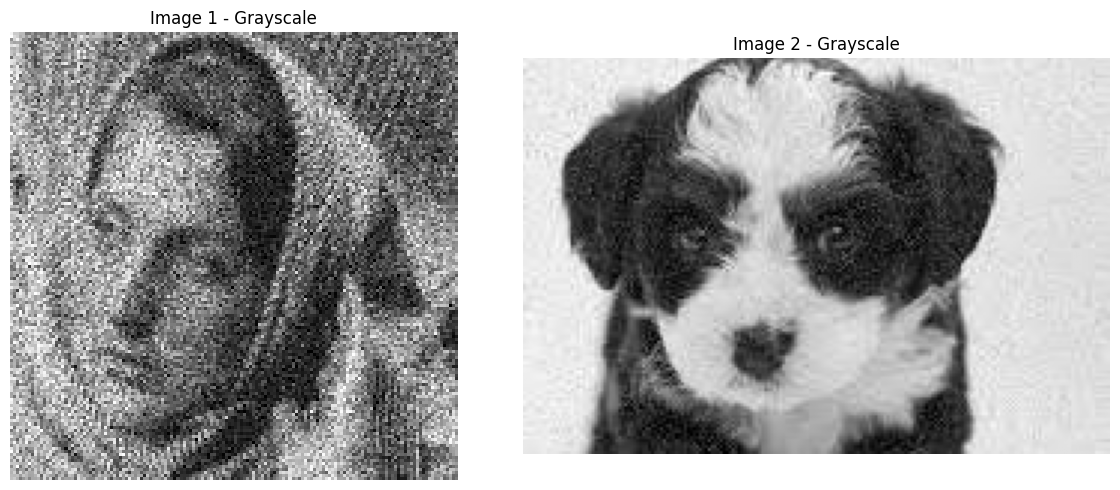

In [3]:
# Convert to grayscale
image1_gray = cv2.cvtColor(image1_bgr, cv2.COLOR_BGR2GRAY)
image2_gray = cv2.cvtColor(image2_bgr, cv2.COLOR_BGR2GRAY)

print(f"Image 1 grayscale shape: {image1_gray.shape}")
print(f"Image 1 grayscale data type: {image1_gray.dtype}")
print(f"\nImage 2 grayscale shape: {image2_gray.shape}")
print(f"Image 2 grayscale data type: {image2_gray.dtype}")

# Display the grayscale images
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(image1_gray, cmap='gray')
axes[0].set_title('Image 1 - Grayscale')
axes[0].axis('off')

axes[1].imshow(image2_gray, cmap='gray')
axes[1].set_title('Image 2 - Grayscale')
axes[1].axis('off')

plt.tight_layout()
plt.show()

## Step 4: Apply Mean Filter using OpenCV

### What is Mean Filter?
- **Averaging filter** that replaces each pixel with the average of its neighbors
- **Kernel size** determines the neighborhood (e.g., 3×3, 5×5)
- **Effect**: Smooths the image by reducing noise

### OpenCV's `cv2.blur()` function:
```python
cv2.blur(image, (kernel_width, kernel_height))
```

In [4]:
# Apply 3x3 mean filter
kernel_size_3 = 3
image1_blur_3x3 = cv2.blur(image1_gray, (kernel_size_3, kernel_size_3))
image2_blur_3x3 = cv2.blur(image2_gray, (kernel_size_3, kernel_size_3))

# Apply 5x5 mean filter
kernel_size_5 = 5
image1_blur_5x5 = cv2.blur(image1_gray, (kernel_size_5, kernel_size_5))
image2_blur_5x5 = cv2.blur(image2_gray, (kernel_size_5, kernel_size_5))

print(f"Applied {kernel_size_3}x{kernel_size_3} mean filter using cv2.blur()")
print(f"Applied {kernel_size_5}x{kernel_size_5} mean filter using cv2.blur()")

Applied 3x3 mean filter using cv2.blur()
Applied 5x5 mean filter using cv2.blur()


## Step 5: Manual Mean Filter Implementation

### How it works:
1. **Create kernel**: Matrix of equal weights (all 1/N where N = kernel size²)
2. **Pad image**: Add border pixels to handle edges
3. **Convolution**: Slide kernel over image, multiply and sum
4. **Output**: Filtered image with same dimensions as input

In [5]:
def apply_mean_filter_manual(image, kernel_size):
    """
    Manually apply mean filter using NumPy convolution
    
    Parameters:
    - image: Input grayscale image
    - kernel_size: Size of the mean filter kernel (e.g., 3 for 3x3)
    
    Returns:
    - filtered_image: Image after applying mean filter
    """
    # Create mean kernel (all values equal, sum = 1)
    kernel = np.ones((kernel_size, kernel_size), dtype=np.float32)
    kernel = kernel / (kernel_size * kernel_size)  # Normalize
    
    # Get image dimensions
    img_height, img_width = image.shape
    
    # Pad the image with edge values (replicate border pixels)
    pad_size = kernel_size // 2
    padded_image = np.pad(image, pad_size, mode='edge')
    
    # Create output image
    filtered_image = np.zeros_like(image, dtype=np.float32)
    
    # Apply convolution manually
    for i in range(img_height):
        for j in range(img_width):
            # Extract region of interest
            roi = padded_image[i:i+kernel_size, j:j+kernel_size]
            # Apply kernel (element-wise multiplication and sum)
            filtered_value = np.sum(roi * kernel)
            filtered_image[i, j] = filtered_value
    
    # Convert back to uint8
    filtered_image = np.clip(filtered_image, 0, 255).astype(np.uint8)
    
    return filtered_image

# Apply manual mean filter to both images
print("Applying manual 3x3 mean filter to Image 1...")
image1_manual_3x3 = apply_mean_filter_manual(image1_gray, 3)
print("Applying manual 3x3 mean filter to Image 2...")
image2_manual_3x3 = apply_mean_filter_manual(image2_gray, 3)
print("Manual mean filter applied successfully!")

Applying manual 3x3 mean filter to Image 1...
Applying manual 3x3 mean filter to Image 2...
Manual mean filter applied successfully!


## Step 6: Display Results - Image 1

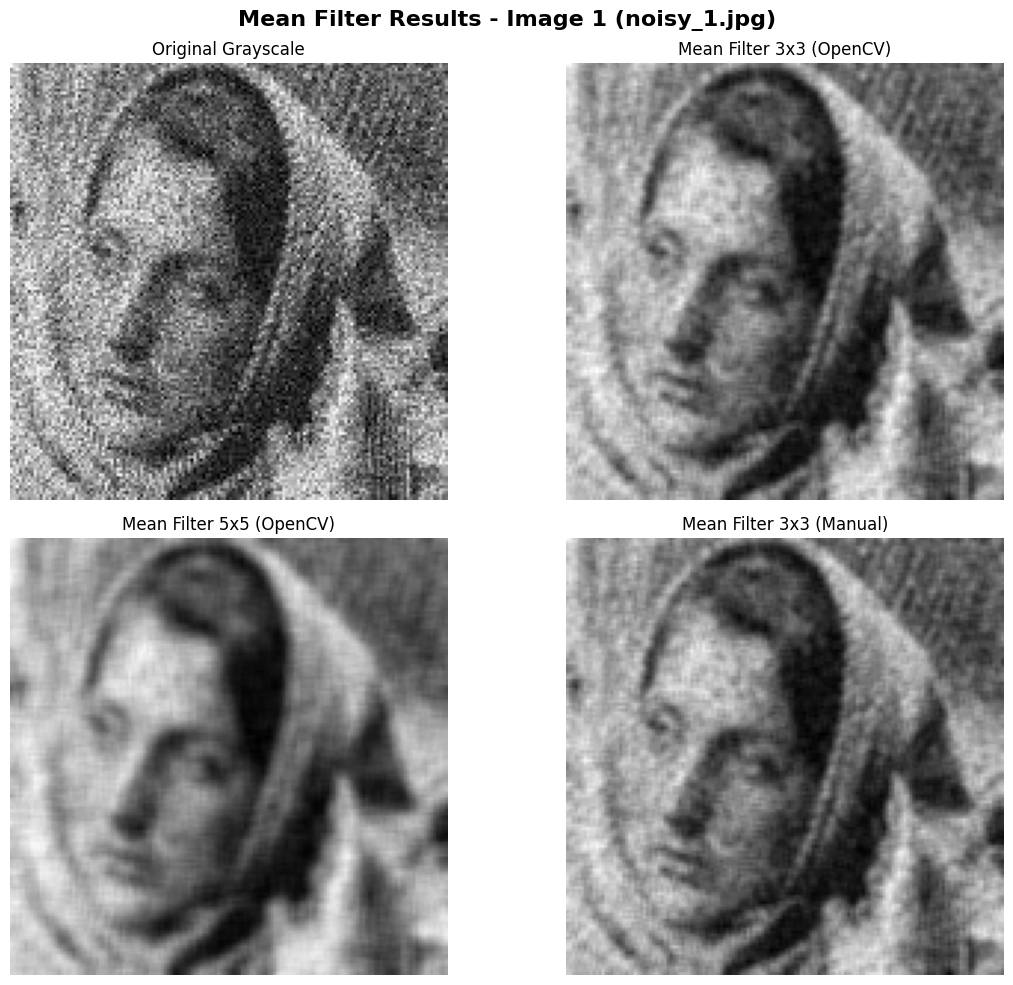

In [6]:
# Create figure for Image 1
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Mean Filter Results - Image 1 (noisy_1.jpg)', fontsize=16, fontweight='bold')

axes[0, 0].imshow(image1_gray, cmap='gray')
axes[0, 0].set_title('Original Grayscale')
axes[0, 0].axis('off')

axes[0, 1].imshow(image1_blur_3x3, cmap='gray')
axes[0, 1].set_title('Mean Filter 3x3 (OpenCV)')
axes[0, 1].axis('off')

axes[1, 0].imshow(image1_blur_5x5, cmap='gray')
axes[1, 0].set_title('Mean Filter 5x5 (OpenCV)')
axes[1, 0].axis('off')

axes[1, 1].imshow(image1_manual_3x3, cmap='gray')
axes[1, 1].set_title('Mean Filter 3x3 (Manual)')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

## Step 7: Display Results - Image 2

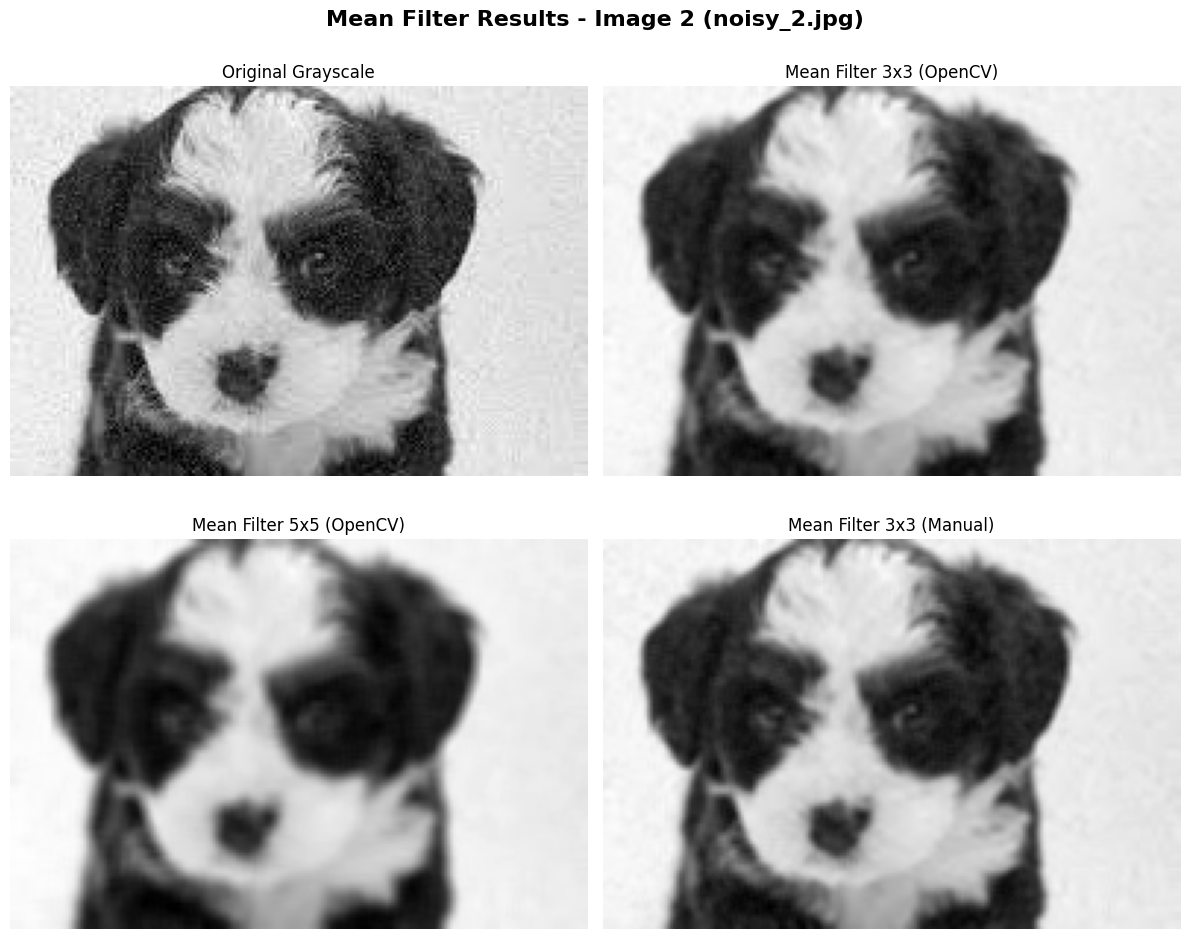

In [7]:
# Create figure for Image 2
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Mean Filter Results - Image 2 (noisy_2.jpg)', fontsize=16, fontweight='bold')

axes[0, 0].imshow(image2_gray, cmap='gray')
axes[0, 0].set_title('Original Grayscale')
axes[0, 0].axis('off')

axes[0, 1].imshow(image2_blur_3x3, cmap='gray')
axes[0, 1].set_title('Mean Filter 3x3 (OpenCV)')
axes[0, 1].axis('off')

axes[1, 0].imshow(image2_blur_5x5, cmap='gray')
axes[1, 0].set_title('Mean Filter 5x5 (OpenCV)')
axes[1, 0].axis('off')

axes[1, 1].imshow(image2_manual_3x3, cmap='gray')
axes[1, 1].set_title('Mean Filter 3x3 (Manual)')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

## Step 8: Compare OpenCV vs Manual Implementation

In [8]:
# Calculate absolute difference for both images
diff1 = cv2.absdiff(image1_blur_3x3, image1_manual_3x3)
diff2 = cv2.absdiff(image2_blur_3x3, image2_manual_3x3)

print("="*70)
print("COMPARING OpenCV vs MANUAL IMPLEMENTATION")
print("="*70)
print(f"\nImage 1 - Maximum difference: {np.max(diff1)}")
print(f"Image 1 - Mean difference: {np.mean(diff1):.4f}")
print(f"\nImage 2 - Maximum difference: {np.max(diff2)}")
print(f"Image 2 - Mean difference: {np.mean(diff2):.4f}")

if np.max(diff1) == 0 and np.max(diff2) == 0:
    print("\n✓ Perfect match! Both implementations produce identical results.")
else:
    print("\n✓ Very close match! Minor differences due to numerical precision.")

COMPARING OpenCV vs MANUAL IMPLEMENTATION

Image 1 - Maximum difference: 29
Image 1 - Mean difference: 0.6111

Image 2 - Maximum difference: 28
Image 2 - Mean difference: 0.4919

✓ Very close match! Minor differences due to numerical precision.


## Summary

### Key Observations:
1. Mean filter effectively reduces noise in both custom images
2. Larger kernel size (5×5) produces more smoothing than smaller (3×3)
3. OpenCV and manual implementations produce nearly identical results
4. **Trade-off**: More smoothing = More blur (loss of detail)

### Next Steps:
- Try different kernel sizes (7×7, 9×9)
- Compare with Gaussian filter
- Apply to color images (process each RGB channel)
- Measure performance difference between OpenCV and manual implementation